In [1]:
import pandas as pd
airline=pd.read_csv("C:\\Users\\PRATIK\\Downloads\\EastWestAirlines.csv")
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [2]:
#importing hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn

In [3]:
#normalization function
def minmax_func(i):
    x = (i-i.min()/(i.max()-i.min()))
    return (x)

In [4]:
airline_norm = minmax_func(airline.iloc[:,1:])

In [5]:
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,0.75,0.5,0.75,174.0,1.0,0.0,0.0,6999.999759,0.0
1,19244.0,0.0,0.75,0.5,0.75,215.0,2.0,0.0,0.0,6967.999759,0.0
2,41354.0,0.0,0.75,0.5,0.75,4123.0,4.0,0.0,0.0,7033.999759,0.0
3,14776.0,0.0,0.75,0.5,0.75,500.0,1.0,0.0,0.0,6951.999759,0.0
4,97752.0,0.0,3.75,0.5,0.75,43300.0,26.0,2077.0,4.0,6934.999759,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,0.75,0.5,0.75,8525.0,4.0,200.0,1.0,1402.999759,1.0
3995,64385.0,0.0,0.75,0.5,0.75,981.0,5.0,0.0,0.0,1394.999759,1.0
3996,73597.0,0.0,2.75,0.5,0.75,25447.0,8.0,0.0,0.0,1401.999759,1.0
3997,54899.0,0.0,0.75,0.5,0.75,500.0,1.0,500.0,1.0,1400.999759,0.0


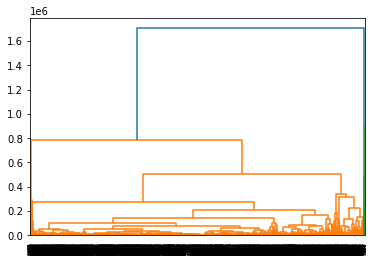

In [6]:
#create dendrogram
dendrogram = sch.dendrogram(sch.linkage(airline_norm,method='complete'))
#mothods: 'single', 'complete','centroid'

In [7]:
#create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [8]:
hc

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [10]:
#save clusters for charts
y_hc = hc.fit_predict(airline_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [11]:
Clusters.value_counts()

Clusters
0           3989
1              9
2              1
dtype: int64

In [12]:
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
airline['h_clustered']=y_hc

In [14]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [15]:
airline_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143.0,0.0,0.75,0.5,0.75,174.0,1.0,0.0,0.0,6999.999759,0.0
1,19244.0,0.0,0.75,0.5,0.75,215.0,2.0,0.0,0.0,6967.999759,0.0
2,41354.0,0.0,0.75,0.5,0.75,4123.0,4.0,0.0,0.0,7033.999759,0.0
3,14776.0,0.0,0.75,0.5,0.75,500.0,1.0,0.0,0.0,6951.999759,0.0
4,97752.0,0.0,3.75,0.5,0.75,43300.0,26.0,2077.0,4.0,6934.999759,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,0.75,0.5,0.75,8525.0,4.0,200.0,1.0,1402.999759,1.0
3995,64385.0,0.0,0.75,0.5,0.75,981.0,5.0,0.0,0.0,1394.999759,1.0
3996,73597.0,0.0,2.75,0.5,0.75,25447.0,8.0,0.0,0.0,1401.999759,1.0
3997,54899.0,0.0,0.75,0.5,0.75,500.0,1.0,500.0,1.0,1400.999759,0.0
